# Знакомство с данными

## MNIST Digits

Воспользуйтесь данными с https://www.kaggle.com/c/digit-recognizer/data 
Далее предполагается, что файлы test.csv и train.csv расположены в одной директории с notebook-ом.

In [1]:
import csv
import numpy as np
import pylab as plt
%matplotlib inline
from PIL import Image

In [2]:
# Признаки и метки классов в обучающей выборке:
ifile = open('train.csv', 'r')
read = csv.reader(ifile)

train_values = []  # метки
train_data = []    # признаки

next(read)
for row in read:
    train_values.append(row[0])
    train_data.append(row[1:])

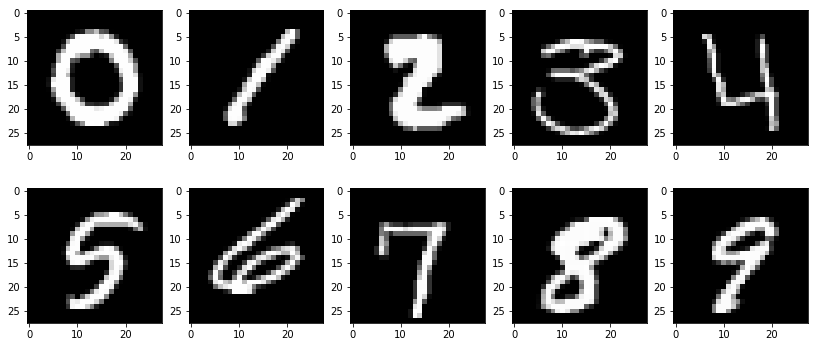

In [3]:
# Каждая из 10 цифр:
np_train_values = np.array(train_values, dtype=float)
np_train_data = np.array(train_data, dtype=float)   

plt.figure(figsize=(14, 6))
imgs = []
for i in range(10):
    for j in range(np_train_values.shape[0]):
        if (np_train_values[j] == i):
            plt.subplot(2, 5, i + 1)
            plt.imshow(np.array(np.split(np_train_data[j], 28)), cmap='gray')
            break
plt.show()

In [4]:
# Количество признаков и объектов в выборке. Типы признаков и объектов?

Изначально документ считывается в формате csv, то есть таблицей значений.
Каждому объекту соответствует строка, которую мы запишем как list размера 785, каждый элемент которого является целочисленным значением, описывающим текущий пиксель (за исключением 0-го, являющегося меткой).
Т.к. изначально каждой метке сопоставляется 784 значения, то мы каждую такую строку побьём на двумерный массив 28x28, чтобы затем преобразовать в изображение.

In [5]:
# !!!!не надо !!!!!
# в любой удобной для Вас форме нарисуйте матрицу из графиков, на дигонали у которой гистограммы, 
# а вне диагонали -- диаграммы рассеяния (см. http://pandasplotting.blogspot.ru/2012/04/histograms-and-scatter-matrix.html). 
# Прокомментируйте график

In [6]:
# нарисуйте среднее изображение, нарисуйте среднее изображение для каждой из цифр
# Прокомментируйте

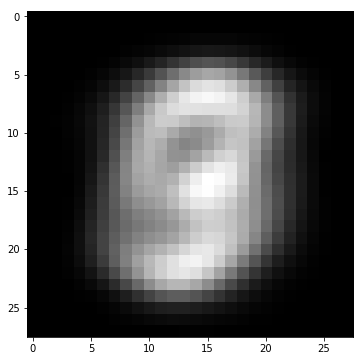

In [7]:
# Среднее изображение avg_im
avg_im = []
for ar in np_train_data:
    avg_im.append(ar)

avg_im = np.mean(avg_im, axis=0)
np_splitted = np.array(np.split(avg_im, 28))

plt.figure(figsize=(15, 6))
res = plt.imshow(np_splitted, cmap='gray')
plt.show()

Как видно из вывода, средним изображением для всех цифр из train.csv является размытое среднее всех цифр.

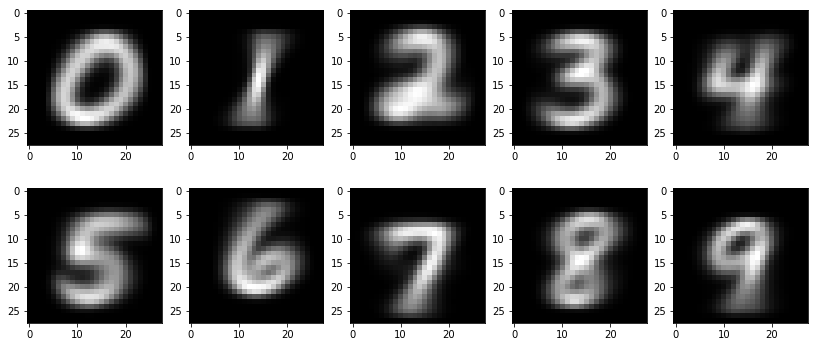

In [8]:
# Среднее изображение для каждой из цифр avg_img
plt.figure(figsize=(14, 6))
img_avgs = []
for i in range (10):
    avg_img = []
    for v in range (np_train_values.shape[0]):
        if (np_train_values[v] == i):
            avg_img.append(np_train_data[v])
    avg_img_mean = np.mean(avg_img, axis=0)
    img_avgs.append(avg_img_mean)
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.array(np.split(avg_img_mean, 28)), cmap='gray')
plt.show()

Как видно, в случае среднего для уникальной цифры, каждое среднее изображение хоть и является размытым, но тем не менее на нём явно отображена конкретная цифра.

In [9]:
# нарисуйте 3 самых близких с среднему изображению и 3 самых далеких от среднего изображений
# Прокомментируйте

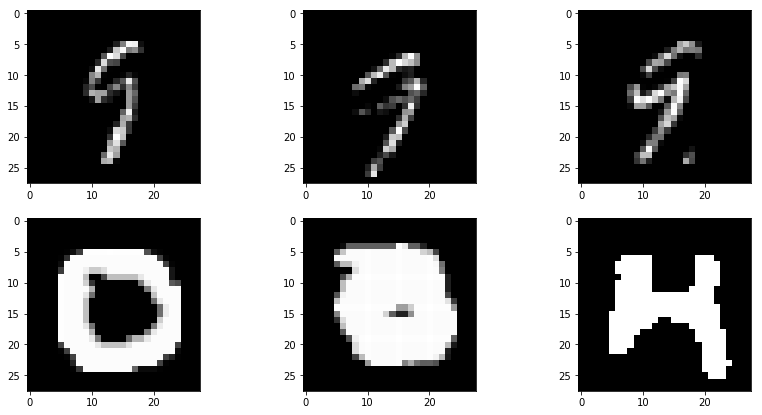

In [10]:
from heapq import nsmallest
from heapq import nlargest

n = 3
f = lambda x: np.sqrt(sum((x - avg_im)**2))
small = nsmallest(n, np_train_data, key=f)
large = nlargest(n, np_train_data, key=f)

plt.figure(figsize=(14, 7))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(np.array(np.split(small[i], 28)), cmap="gray")
    plt.subplot(2, n, i + 3 + 1)
    plt.imshow(np.array(np.split(large[i], 28)), cmap="gray")

3 самых близких к среднему схожи между собой и очертаниями напоминают цифру 9.
3 самых далеких от среднего практически разные между собой и напоминают 0 и 4.

In [11]:
# повторите предыдущий пункт для каждой из цифр
# Прокомментируйте

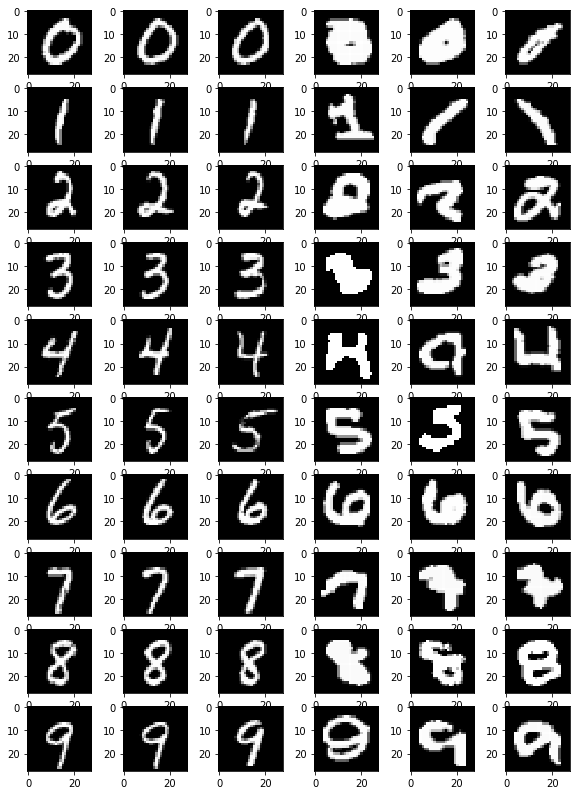

In [12]:
n = 3
plt.figure(figsize=(10, 14))
for i in range(10):
    np_train_data_cur_num = []
    for k in range(np_train_values.shape[0]):
        if (np_train_values[k] == i):
            np_train_data_cur_num.append(np_train_data[k])
    f = lambda x: np.sqrt(sum((x - img_avgs[i])**2))
    sm = nsmallest(n, np_train_data_cur_num, key=f)
    lg = nlargest(n, np_train_data_cur_num, key=f)
    for j in range(n):
        plt.subplot(10, 2 * n, i * 2 * n + j + 1)
        plt.imshow(np.array(np.split(sm[j], 28)), cmap="gray")
        plt.subplot(10, 2 * n, i * 2 * n + j + 3 + 1)
        plt.imshow(np.array(np.split(lg[j], 28)), cmap="gray")

Самые близкие к среднему каждой цифры изображения отчетливо различимы, в то время как самые дальние к среднему, хоть и похожи между собой, изображены нечетко.

In [13]:
# разбейте выборку на две псевдослучайные подвыборки повторяемым образом (70:30)
from sklearn.model_selection import train_test_split

ifile  = open('train.csv', 'r')
read = csv.reader(ifile)
file_data = []

next(read)
for row in read:
    file_data.append(row)
data_train, data_test = train_test_split(file_data, train_size=0.7, test_size=0.3, random_state=19)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Bad usage
print("-"*80)
print("\nBad usage example\n")
for experiment_index in range(2):
    print("Experiment №", experiment_index)
    print("Our code")
    np.random.seed(0)
    print(np.random.normal())
    print(np.random.normal())
    print("Code after")
    print(np.random.normal())
    print(np.random.normal())

## Good usage
print("-"*80)
print("\nGood usage example\n")
for experiment_index in range(2):
    print("Experiment №", experiment_index)
    print("Our code")
    current_state = np.random.get_state()
    np.random.seed(0)
    print(np.random.normal(1))
    print(np.random.normal(1))
    np.random.set_state(current_state)
    print("Code after")
    print(np.random.normal())
    print(np.random.normal(1))

--------------------------------------------------------------------------------

Bad usage example

Experiment № 0
Our code
1.764052345967664
0.4001572083672233
Code after
0.9787379841057392
2.240893199201458
Experiment № 1
Our code
1.764052345967664
0.4001572083672233
Code after
0.9787379841057392
2.240893199201458
--------------------------------------------------------------------------------

Good usage example

Experiment № 0
Our code
2.764052345967664
1.4001572083672233
Code after
1.8675579901499675
0.022722120123588985
Experiment № 1
Our code
2.764052345967664
1.4001572083672233
Code after
0.9500884175255894
0.8486427917023021


In [14]:
# Какая еще информация о данных кажется Вам важной?

Я считаю, что одним из наиболее важных критериев является вид, в котором подаются данные. Например, если для какой-либо метки один из признаков неизвестен или не посчитан, то необходимо правильно его обработать, чтобы при выполнении обучения не возникало ненужных ошибок.